In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import import_ipynb
import random, operator, time, itertools, math
import numpy
import tsp_parser
from tsp_parser import read_tsp_file
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

importing Jupyter notebook from tsp_parser.ipynb
importing Jupyter notebook from city.ipynb


In [2]:
tsp = read_tsp_file('./symmetric_problems/berlin52.tsp')

In [3]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)


In [4]:
alltours = itertools.permutations # The permutation function is already defined in the itertools module
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [8]:

def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [9]:
City = complex

In [10]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [11]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [12]:
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [13]:
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)
cities8

{(321+577j),
 (340+280j),
 (348+189j),
 (530+483j),
 (566+31j),
 (641+547j),
 (693+107j),
 (855+139j)}

In [14]:
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)

In [15]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)

In [16]:
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

In [17]:
tour = exact_TSP(cities8)

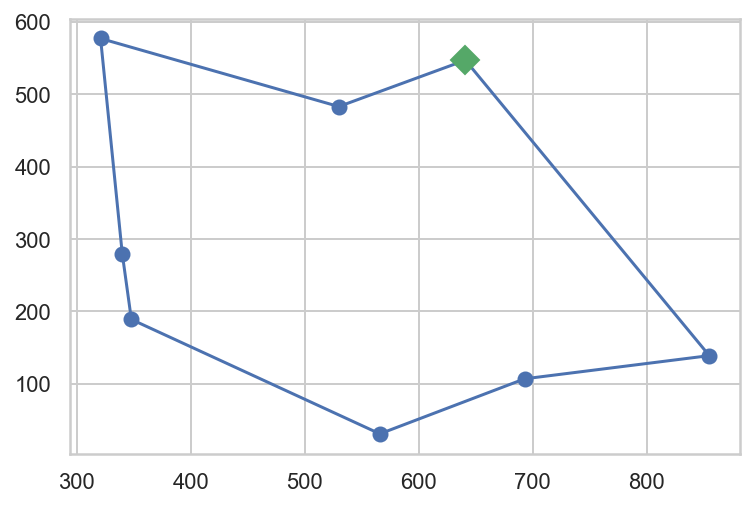

In [18]:
plot_tour(tour)

In [23]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))

In [24]:
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [25]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [26]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [27]:
cities = generate_cities(9)

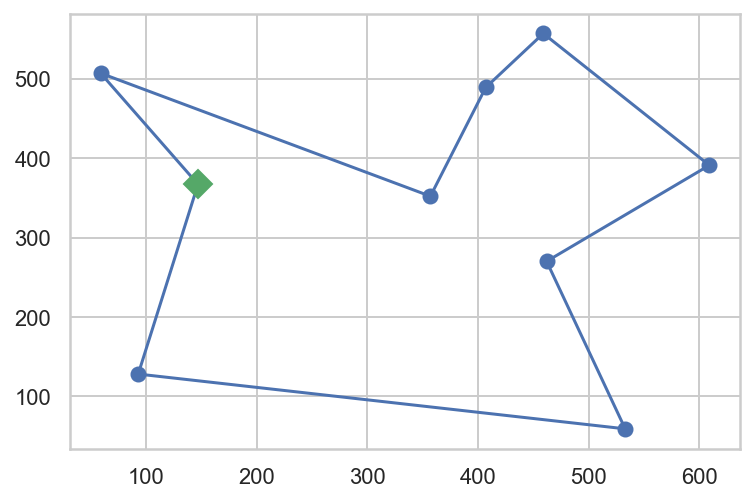

In [29]:
plot_tour(exact_non_redundant_TSP(cities))

In [30]:
%timeit greedy_TSP(cities)

12.2 µs ± 80.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


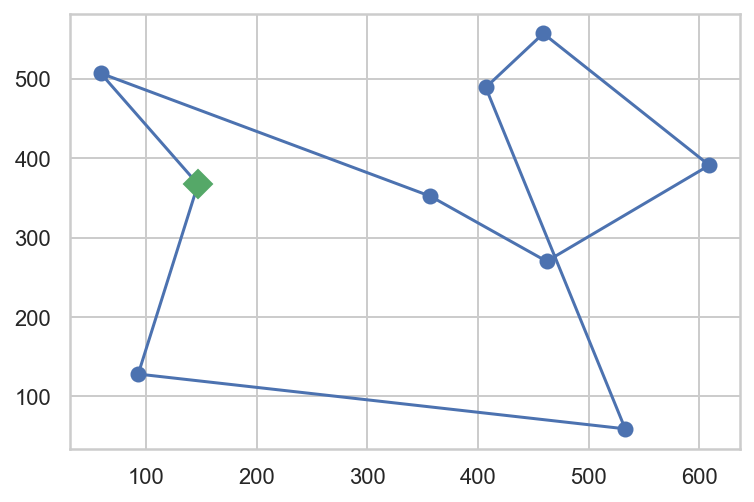

In [31]:

plot_tour(greedy_TSP(cities))

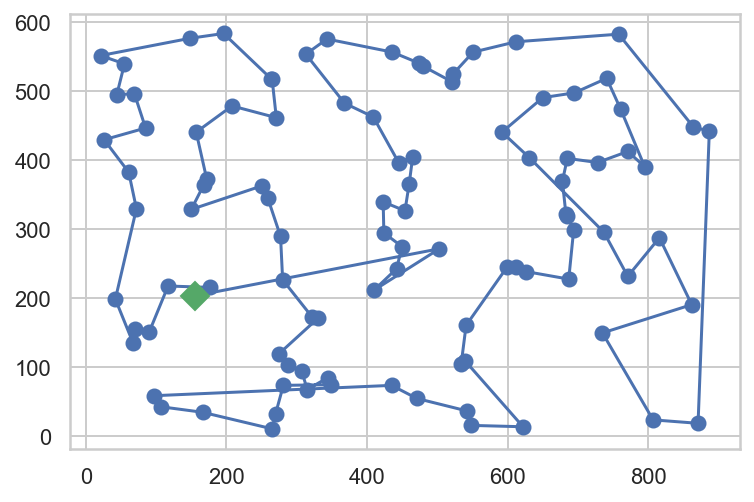

In [32]:
plot_tour(greedy_TSP(cities100))